In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
# Import all the tools we need


# Regular EDA(exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_excel('/kaggle/input/pile-load/Data-2-Copy.xlsx')

In [3]:
type(df)

pandas.core.frame.DataFrame

In [4]:
df.to_csv('/kaggle/working/pile-load.csv', index=False)

In [5]:
df = pd.read_csv('/kaggle/working/pile-load.csv')

In [6]:
df.shape

(100, 9)

In [7]:
df.head(2)

,Pile Material,Average Cohesion (kN/m2),Average Friction angle (°),Average soil Specific weight (kN/m3),Average Pile-Soil friction angle (°),Flap Number,Pile Area (m2),Pile Length (m),Pile Capacity (kN)
0,Steel,33.0,28.85,9.82,12.49,20.1,0.1,19.5,1040.0
1,Steel,33.0,29.89,9.73,12.41,27.0,0.1,23.5,1400.0


In [8]:
# Get the column names
column_names = df.columns.tolist()
column_names

['Pile Material',
 'Average Cohesion (kN/m2)',
 'Average Friction angle (°)',
 'Average soil Specific weight (kN/m3)',
 'Average Pile-Soil friction angle (°)',
 'Flap Number',
 'Pile Area (m2)',
 'Pile Length (m)',
 'Pile Capacity (kN)']

In [9]:
df.dtypes

Pile Material                            object
Average Cohesion (kN/m2)                float64
Average Friction angle (°)              float64
Average soil Specific weight (kN/m3)    float64
Average Pile-Soil friction angle (°)    float64
Flap Number                             float64
Pile Area (m2)                          float64
Pile Length (m)                         float64
Pile Capacity (kN)                      float64
dtype: object

<Axes: >

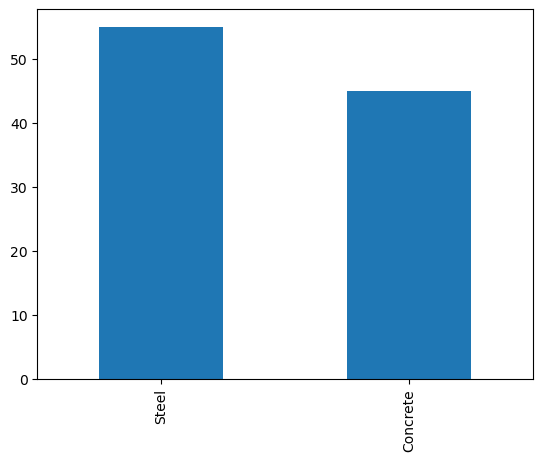

In [10]:
df['Pile Material'].value_counts().plot(kind='bar')

In [11]:
sdf = df[df['Pile Material'] == 'Steel'].copy()
cdf = df[df['Pile Material'] == 'Concrete'].copy()

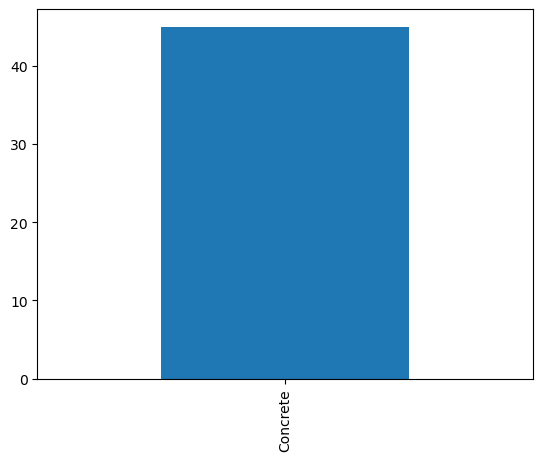

In [12]:
cdf['Pile Material'].value_counts().plot(kind='bar');


# For Steel

In [13]:
sdf.head()

,Pile Material,Average Cohesion (kN/m2),Average Friction angle (°),Average soil Specific weight (kN/m3),Average Pile-Soil friction angle (°),Flap Number,Pile Area (m2),Pile Length (m),Pile Capacity (kN)
0,Steel,33.0,28.85,9.82,12.49,20.1,0.1,19.5,1040.0
1,Steel,33.0,29.89,9.73,12.41,27.0,0.1,23.5,1400.0
2,Steel,33.0,28.81,9.82,12.49,20.0,0.1,19.4,990.0
3,Steel,0.0,28.00,9.57,12.27,21.0,0.1,19.5,960.0
4,Steel,0.0,28.00,9.69,12.22,24.0,0.1,23.5,1330.0


In [14]:
sdf.isna().sum()

Pile Material                           0
Average Cohesion (kN/m2)                0
Average Friction angle (°)              0
Average soil Specific weight (kN/m3)    0
Average Pile-Soil friction angle (°)    0
Flap Number                             0
Pile Area (m2)                          0
Pile Length (m)                         0
Pile Capacity (kN)                      0
dtype: int64

In [15]:
sdf.shape

(55, 9)

In [16]:
X = sdf.drop(['Pile Material', 'Pile Capacity (kN)'], axis=1)
y = sdf['Pile Capacity (kN)']

In [17]:
X.head(2)

,Average Cohesion (kN/m2),Average Friction angle (°),Average soil Specific weight (kN/m3),Average Pile-Soil friction angle (°),Flap Number,Pile Area (m2),Pile Length (m)
0,33.0,28.85,9.82,12.49,20.1,0.1,19.5
1,33.0,29.89,9.73,12.41,27.0,0.1,23.5


In [18]:
y.head(2)

0    1040.0
1    1400.0
Name: Pile Capacity (kN), dtype: float64

In [19]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from catboost import CatBoostRegressor
from sklearn.svm import SVR



from sklearn.model_selection import train_test_split

# # Set data
# X = sdf.drop(['Pile Material', 'Pile Capacity (kN)'], axis=1)
# y = sdf['Pile Capacity (kN)']
# # Split the data into training and testing sets

# np.random.seed(71)

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# len(X_train), len(X_test), len(y_train), len(y_test)

In [20]:
sdf=sdf.drop(['Pile Material'],axis=1)

In [21]:
from sklearn.model_selection import train_test_split
ys=sdf['Pile Capacity (kN)']

In [26]:
Xs=sdf.drop(['Pile Capacity (kN)'],axis=1)
X_train,X_test,y_train,y_test=train_test_split(Xs,ys,train_size=0.8,test_size=0.2)

In [27]:
X_train.head()

,Average Cohesion (kN/m2),Average Friction angle (°),Average soil Specific weight (kN/m3),Average Pile-Soil friction angle (°),Flap Number,Pile Area (m2),Pile Length (m)
33,14.60,32.220,9.890,13.750,15.0,0.10,15.2
89,48.10,31.055,11.217,12.525,2147.0,1.16,21.7
0,33.00,28.850,9.820,12.490,20.1,0.10,19.5
78,21.49,28.530,8.880,13.215,1106.0,1.38,32.2
18,8.70,24.000,8.550,11.750,790.0,0.89,61.0


## RandomForestRegressor

In [28]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=1000,max_leaf_nodes=40,random_state=42)
model.fit(X_train,y_train)

RandomForestRegressor(max_leaf_nodes=40, n_estimators=1000, random_state=42)

In [29]:
model.score(X_test, y_test)

0.9590450337384947

In [30]:
# Make predictions on the test set
y_pred = model.predict(X_test)
print(y_pred)
print(np.array(y_test))

[ 1968.8785  3418.5135  2912.0235  5022.4835  3584.786  42914.89
  3247.0335  2534.9075  3408.6095  3867.598   8335.5485]
[ 3130.  2670.  2595.  5900.  3750. 49350.  2440.  4280.  4150.  4100.
  2870.]


In [31]:
show_scores(model)

NameError: name 'show_scores' is not defined

In [32]:
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.metrics import mean_absolute_percentage_error
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error

def show_scores(model):
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)
    scores = {
        'training MAE': mean_absolute_error(y_train, train_preds),
        'test MAE': mean_absolute_error(y_test, test_preds),
        
        'training MAPE': mean_absolute_percentage_error(y_train, train_preds),
        'test MAPE': mean_absolute_percentage_error(y_test, test_preds),
        
        'training MSE': mean_squared_error(y_train, train_preds),
        'test MSE': mean_squared_error(y_test, test_preds),
        
        'Training R^2': r2_score(y_train, train_preds),
        'Valid R^2': r2_score(y_test, test_preds)
    }
    return scores

In [33]:
def difference(model):
    prbdf = pd.DataFrame({
        'Prediction': model.predict(X_test),
        'True': np.array(y_test)
    })
    prbdf.plot(kind='bar', figsize = (10, 5))

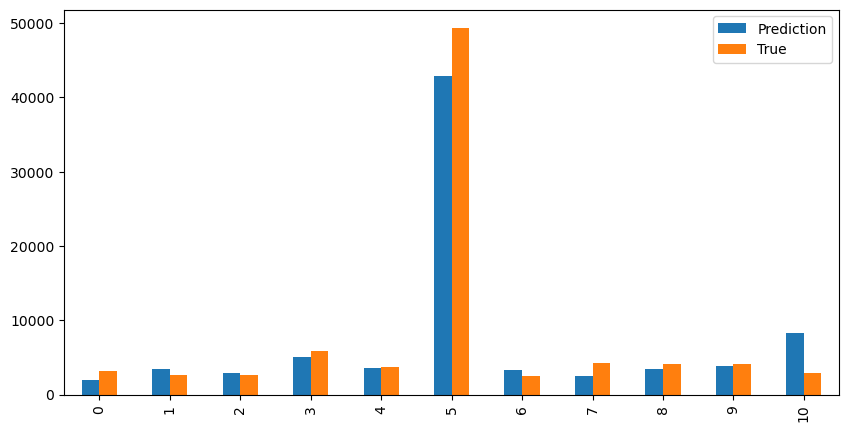

In [34]:
difference(model)

## Linear Regression

In [35]:
lr = LinearRegression(fit_intercept=True)
lr.fit(X_train, y_train)

LinearRegression()

In [36]:
y_pred = lr.predict(X_test)
print(y_pred)
print(np.array(y_test))

[ 4070.92908484  4995.56488696  3785.54040644  4671.02512922
  5326.78297546 36783.75718443  5516.3917102   4052.81501535
  4160.45801963  5844.05566923  7876.40106553]
[ 3130.  2670.  2595.  5900.  3750. 49350.  2440.  4280.  4150.  4100.
  2870.]


In [37]:
show_scores(lr)

{'training MAE': 2647.406980786889,
 'test MAE': 2717.593317207203,
 'training MAPE': 1.137722880216207,
 'test MAPE': 0.5454541058815284,
 'training MSE': 12908384.074437903,
 'test MSE': 18839978.04349556,
 'Training R^2': 0.9019435159773661,
 'Valid R^2': 0.8917265950250708}

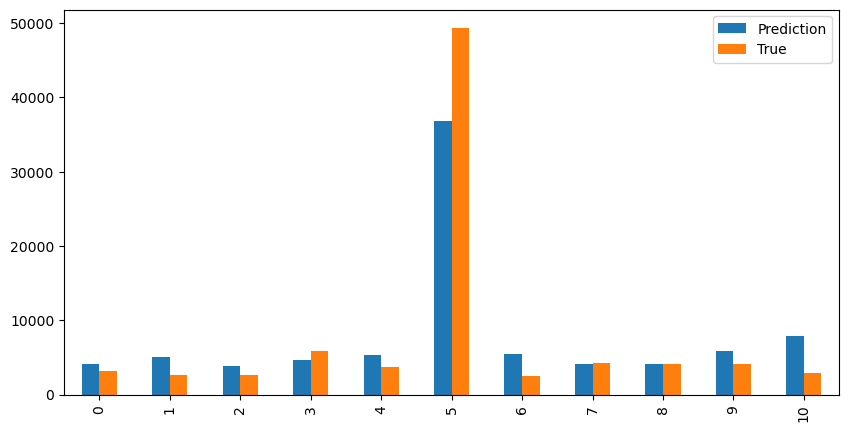

In [38]:
difference(lr)

## XGBoostRegressor

In [39]:
# Create and fit the XGBoost regression model
xr = xgb.XGBRegressor()
xr.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [40]:
y_pred = xr.predict(X_test)
print(y_pred)
print(np.array(y_test))
show_scores(xr)

[ 1797.3248  3378.096   1857.0121  5177.976   3450.018  48260.72
  2623.1057  2685.6912  2924.6287  4078.988   3066.266 ]
[ 3130.  2670.  2595.  5900.  3750. 49350.  2440.  4280.  4150.  4100.
  2870.]


{'training MAE': 0.006466952237215909,
 'test MAE': 737.2827370383523,
 'training MAPE': 2.7523885671385253e-06,
 'test MAPE': 0.1832852954128376,
 'training MSE': 8.50658186457374e-05,
 'test MSE': 794157.7885538096,
 'Training R^2': 0.9999999999993539,
 'Valid R^2': 0.9954359730326879}

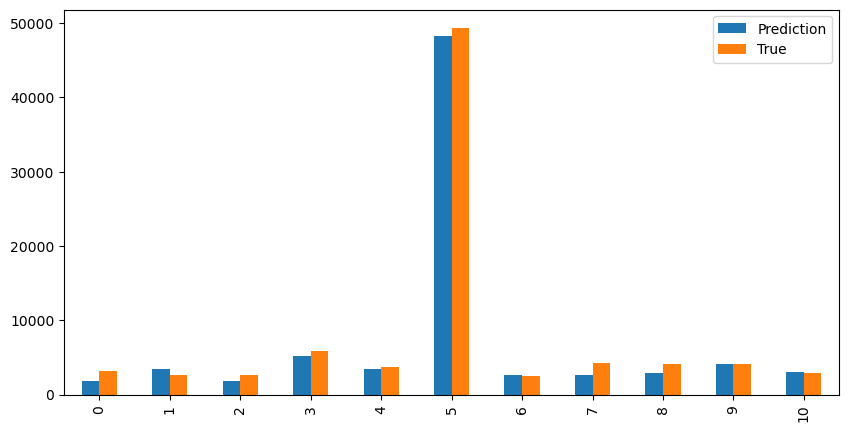

In [41]:
difference(xr)

## CatBoostRegressor

In [42]:
# Loading the BERT Classifier and Tokenizer along with Input module

from IPython.display import clear_output
cr = CatBoostRegressor();
cr.fit(X_train, y_train);
clear_output()

In [43]:
y_pred = cr.predict(X_test)
print(y_pred)
print(np.array(y_test))
show_scores(cr)

[ 2195.15954151  3284.29573438  2439.75433712  4003.88332576
  3464.56042759 39929.4460053   2710.76536045  2258.54637156
  2734.63266966  4180.06458011  3995.37741371]
[ 3130.  2670.  2595.  5900.  3750. 49350.  2440.  4280.  4150.  4100.
  2870.]


{'training MAE': 41.01752647735007,
 'test MAE': 1656.3200372868719,
 'training MAPE': 0.015377087239751223,
 'test MAPE': 0.2284476774684505,
 'training MSE': 2649.727186978163,
 'test MSE': 9194063.354480462,
 'Training R^2': 0.9999798717693806,
 'Valid R^2': 0.9471616929358099}

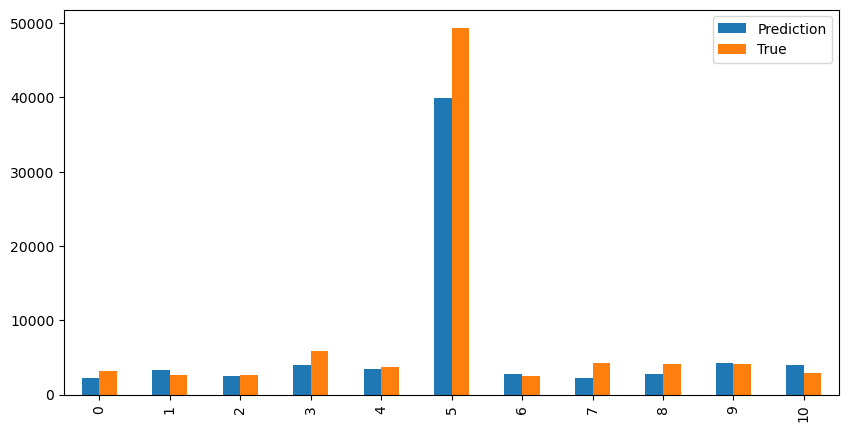

In [44]:
difference(cr)

## SupportVectorRegressor

In [45]:
# Create and fit the SVR model
models= SVR()
models.fit(X_train, y_train)

SVR()

In [46]:
y_pred = models.predict(X_test)
print(y_pred)
print(np.array(y_test))
show_scores(models)

[3489.99037651 3495.47071416 3493.12992242 3491.27507701 3503.17855842
 3511.57099532 3497.73090821 3490.1484239  3512.47042503 3511.82217335
 3490.18031879]
[ 3130.  2670.  2595.  5900.  3750. 49350.  2440.  4280.  4150.  4100.
  2870.]


{'training MAE': 4904.787946601214,
 'test MAE': 4933.730598824673,
 'training MAPE': 0.8229168998103099,
 'test MAPE': 0.30040095561689034,
 'training MSE': 142223934.3023632,
 'test MSE': 191956523.95035002,
 'Training R^2': -0.08038146844209826,
 'Valid R^2': -0.10317466439041167}

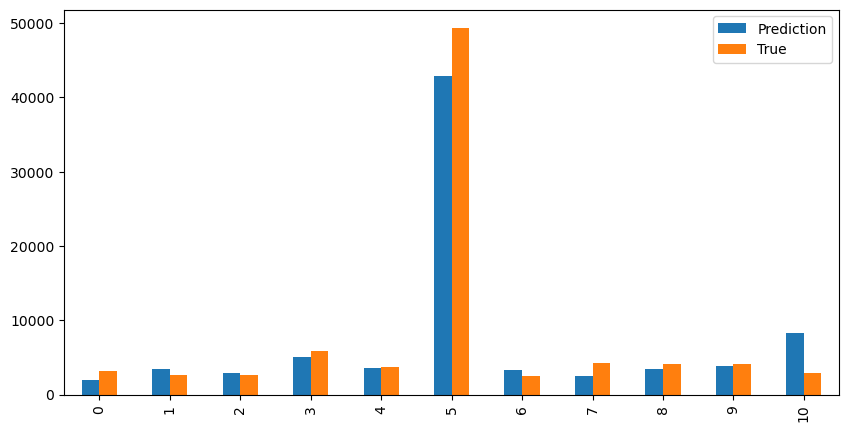

In [47]:
difference(model)

## Differentiate between best model

In [48]:
def shy(model):
    test_preds = model.predict(X_test)
    scores = {
        'R^2': r2_score(y_test, test_preds),
        'MAE': mean_absolute_error(y_test, test_preds),
        'MAPE': mean_absolute_percentage_error(y_test, test_preds)
        
    }
    return scores

In [49]:
shy(model)

{'R^2': 0.9590450337384947,
 'MAE': 1699.6332727272727,
 'MAPE': 0.36134981085428475}

In [50]:
cmp = pd.DataFrame({
    'RFRegressor': shy(model),
    'LinearRegression': shy(lr),
    'XGBRegressor': shy(xr),
    'CatBoostRegressor': shy(cr),
    'SVRegressor': shy(models)
})

In [51]:
cmp

,RFRegressor,LinearRegression,XGBRegressor,CatBoostRegressor,SVRegressor
R^2,0.959045,0.891727,0.995436,0.947162,-0.103175
MAE,1699.633273,2717.593317,737.282737,1656.320037,4933.730599
MAPE,0.361350,0.545454,0.183285,0.228448,0.300401


In [52]:
colors = ['red', 'green', 'blue', 'yellow', 'violet']
colors

['red', 'green', 'blue', 'yellow', 'violet']

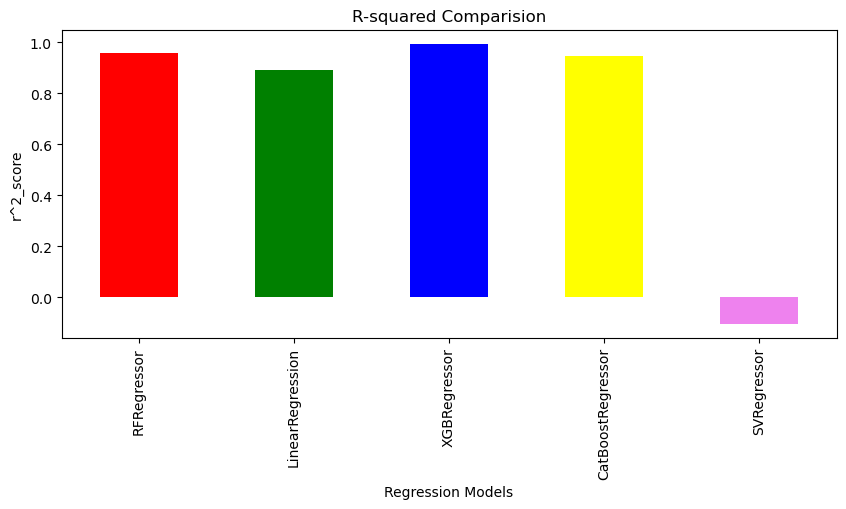

In [53]:
cmp.iloc[0].plot(kind='bar', figsize=(10,4), color=colors, title='R-squared Comparision')
plt.xlabel('Regression Models')
plt.ylabel('r^2_score')
plt.show()

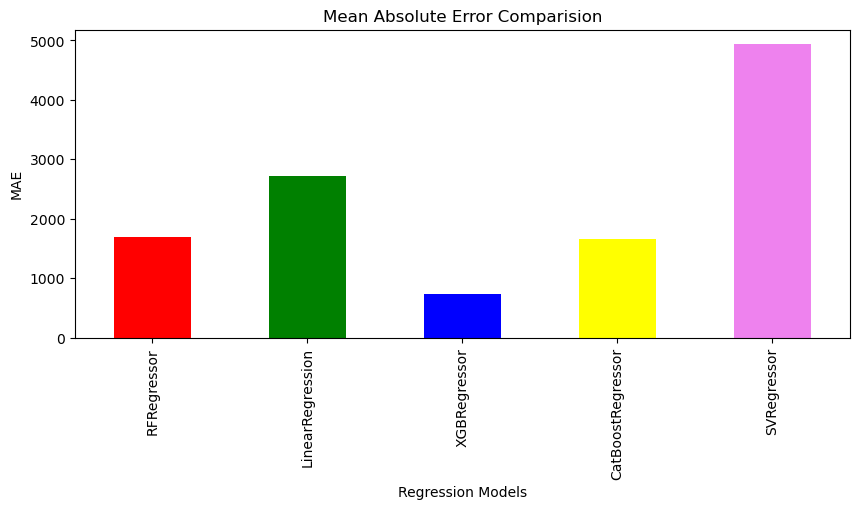

In [54]:
cmp.iloc[1].plot(kind='bar', figsize=(10,4), color=colors, title='Mean Absolute Error Comparision')
plt.xlabel('Regression Models')
plt.ylabel('MAE')
plt.show()

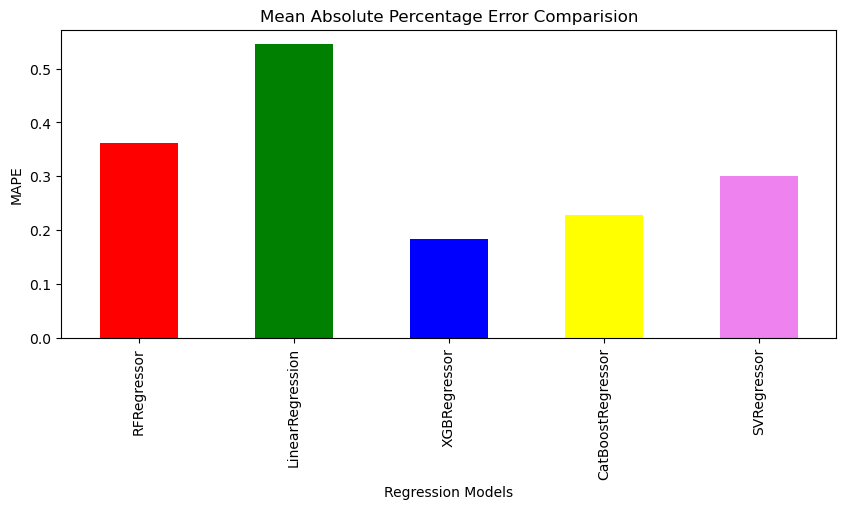

In [55]:
cmp.iloc[2].plot(kind='bar', figsize=(10,4), color=colors, title='Mean Absolute Percentage Error Comparision')
plt.xlabel('Regression Models')
plt.ylabel('MAPE')
plt.show()

author:Tanbeer Jubaer Oitik

## Cross Val Score  -->

In [56]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

def check_cv(model):
    # Perform cross-validation and get the R-squared scores
    scores = cross_val_score(model, X, y, cv=5, scoring='r2')
    print("Cross-Validation R-squared scores:", scores)
    print("Average R-squared score:", scores.mean())
    return scores

## rfc

In [57]:
check_cv(model)

Cross-Validation R-squared scores: [   0.52939434    0.96177044 -227.66531289   -0.64994606   -1.10617716]
Average R-squared score: -45.58605426485229


array([   0.52939434,    0.96177044, -227.66531289,   -0.64994606,
         -1.10617716])

## LInear Regression

In [58]:
check_cv(lr)

Cross-Validation R-squared scores: [   0.91805658    0.79332134 -253.11427036   -8.04138242  -13.03067594]
Average R-squared score: -54.49499015730487


array([   0.91805658,    0.79332134, -253.11427036,   -8.04138242,
        -13.03067594])

## XGBReg..

In [59]:
check_cv(xr)

Cross-Validation R-squared scores: [  -0.81447186    0.97965329 -178.64781989    0.21139083   -6.07444948]
Average R-squared score: -36.869139422362544


array([  -0.81447186,    0.97965329, -178.64781989,    0.21139083,
         -6.07444948])

## CatBoost

In [60]:
ans = check_cv(cr)
clear_output()

In [61]:
print(ans)

[  0.76438822   0.93064912 -85.31208369   0.09687024  -0.57444934]


## Feature Importance

In [62]:
model.feature_importances_

array([0.04104109, 0.01092952, 0.0150592 , 0.01153524, 0.03477922,
       0.05098831, 0.83566743])

In [63]:
# function to plot feature importance
def plot_features(columns, importance, n=20):
    df = (pd.DataFrame({
        'features': columns,
        'feature_importance': importance})
        .sort_values('feature_importance', ascending=False)
        .reset_index(drop=True))
    
    fig, ax = plt.subplots()
    ax.barh(df['features'][:n], df['feature_importance'][:n])
    ax.set_ylabel('Features', color='orange')
    ax.set_xlabel('Feature Importance', color='orange')
    ax.invert_yaxis()
    plt.title('Feature Importance Bar Graph', color='darkblue')

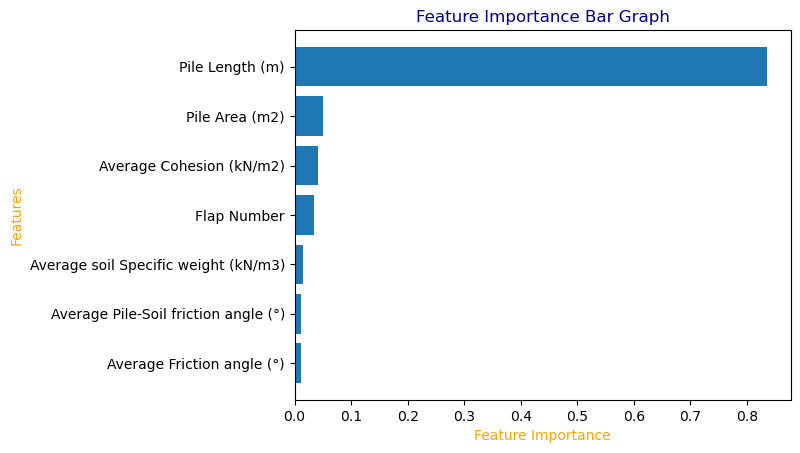

In [65]:
plot_features(X_train.columns, model.feature_importances_)

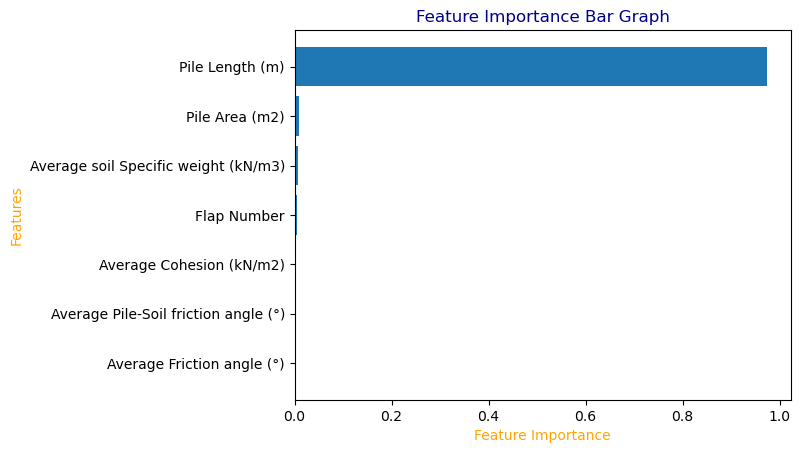

In [67]:
plot_features(X_train.columns, xr.feature_importances_)

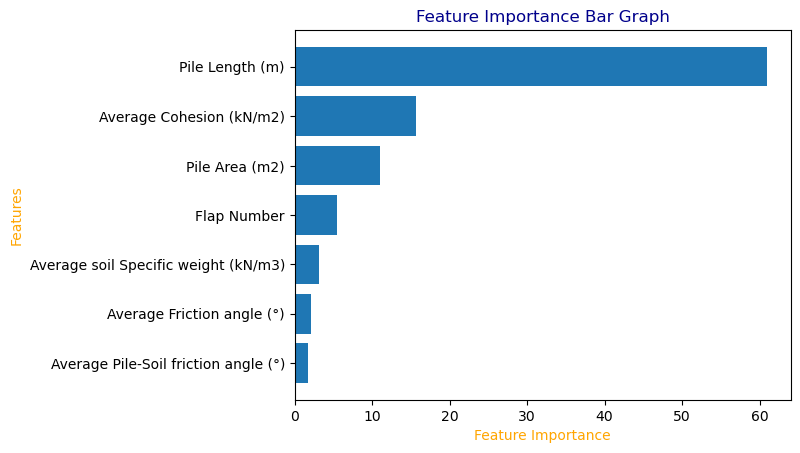

In [68]:
plot_features(X_train.columns, cr.feature_importances_)